# AutoEncoders on Image Data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

Fashion MNST dataset

total Images  = 70000

Image Shape = (28, 28)

Dimensions = 784 (Features of image)

In [9]:
from tensorflow.keras.datasets import fashion_mnist

#### Train-Test load 

In [59]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [60]:
len(X_train),len(X_test)

(60000, 10000)

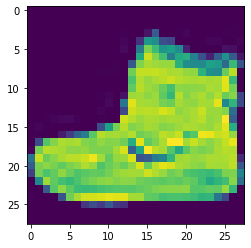

In [61]:
plt.imshow(X_train[0]);

In [62]:
X_train[0].shape

(28, 28)

### Scaling

In [63]:
X_train = X_train / 255 
X_test = X_test / 255

## AutoEncoder


Autoencoder will attempt to learn what pixels are important by passing the image through the Autoencoder when encoded it down to smaller hidden layers, then Autoencoder attempts to decode these layers to recreat the image as the output


**Stacked AutoEncoder**

Stacked AutoEncoder there are Multiple encoders stacked on top of one another.
Stacked AutoEncoders means multiple stacked hidden layers that slowly reduce the dimensionality of the dataset.

## Building AutoEncoder

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam,SGD

In [65]:
X_train.shape

(60000, 28, 28)

### Building Encoder

In [18]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[28,28]))    # Flatten this from(28,28) to 784

encoder.add(Dense(400, activation='relu'))   # reduced to Half => 784 to 400
encoder.add(Dense(200, activation='relu'))   # reduced to Half => 400 to 200
encoder.add(Dense(100, activation='relu'))   # reduced to Half => 200 to 100
encoder.add(Dense(50, activation='relu'))   # reduced to Half => 100 to 50
encoder.add(Dense(25, activation='relu'))   # reduced to Half => 50 to 25 (3%)

### Building Decoder

Decoding(reverse) what encoder has done

Skips the last layer of encoder


In [19]:
decoder = Sequential()

decoder.add(Dense(50, input_shape=[25], activation='relu'))    # 25 is the last layer of our encoder
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(28 *28, activation='sigmoid'))     # because of binarycrossentropy loss

decoder.add(Reshape([28,28]))   # reshape back (28,28) image

### Encoder + Decoder as AutoEncoder

In [20]:
autoencoder = Sequential([encoder, decoder])

In [21]:
autoencoder.compile(loss='binary_crossentropy',                      # checked only image produced is matched the input image
                                   optimizer=SGD(lr=1.5), 
                                   metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Training AutoEncoder

AutoEncoder is semi-supervised learning. AutoEncoders actually trying to predict the classification or anything.

AutoEncoder try to learn the important features and reduce the dimensionality.

input and ouput for fitting is different from supervised learning.

In [50]:
X_train.shape

(60000, 28, 28)

In [27]:
autoencoder.fit(X_train, X_train,
                       epochs=20,
                       validation_data=(X_test, X_test))

Epoch 1/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3448 - accuracy: 0.0804 - val_loss: 0.3337 - val_accuracy: 0.0886
Epoch 2/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3176 - accuracy: 0.0941 - val_loss: 0.3128 - val_accuracy: 0.0975
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3102 - accuracy: 0.1022 - val_loss: 0.3089 - val_accuracy: 0.1089
Epoch 4/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3058 - accuracy: 0.1105 - val_loss: 0.3057 - val_accuracy: 0.1173
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3028 - accuracy: 0.1180 - val_loss: 0.3095 - val_accuracy: 0.1188
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3006 - accuracy: 0.1238 - val_loss: 0.3111 - val_accuracy: 0.1220
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2989 - accuracy: 0.1287 - val_loss: 0.3027 -

### Evaluating  AutoEncoder

In [32]:
images_sample = autoencoder.predict(X_test[:10])   #passing 10 images to Autoencoder

Input Image


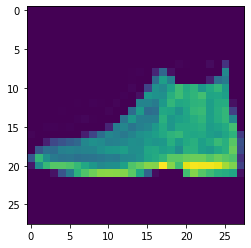

After Recreation


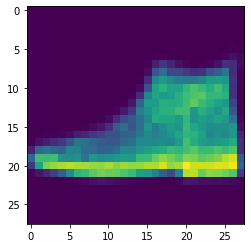

In [33]:
print('Input Image')
plt.imshow(X_test[0])
plt.show();

print('After Recreation')
plt.imshow(images_sample[0]);

## Denoising Using Autoencoder

### Adding noises

In [37]:
from tensorflow.keras.layers import GaussianNoise

In [38]:
sample = GaussianNoise(0.2) # more the std value, the more noise

In [39]:
noisey = sample(X_test[:10], training=True) # training with 10 images of Test dataset

Original Image


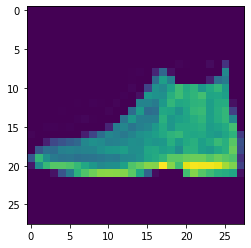

Noisey Version


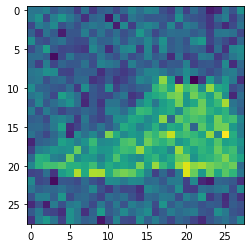

In [41]:
print('Original Image')
plt.imshow(X_test[0])
plt.show();

print('Noisey Version')
plt.imshow(noisey[0]);

## Building Noise Remover Autoencoder 

### Encoder

In [68]:
import tensorflow as tf

In [44]:
tf.random.set_seed(101) # initialize the random number generator

In [46]:
encoder = Sequential()

encoder.add(Flatten(input_shape = [28,28]))

# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

### Decoder

In [47]:
decoder = Sequential()

decoder.add(Dense(50, input_shape =[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))

decoder.add(Reshape([28,28]))

### Noise Remover AutoEncoder

In [50]:
noise_remover = Sequential([encoder, decoder])

In [51]:
noise_remover.compile(loss='binary_crossentropy', 
                                     optimizer=SGD(lr=1.5),
                                     metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Train Noise Remover AutoEncoder 

In [53]:
noise_remover.fit(X_train, X_train,
                             epochs=20,
                             validation_data=(X_test, X_test))

Epoch 1/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3369 - accuracy: 0.0856 - val_loss: 0.3261 - val_accuracy: 0.0964
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3179 - accuracy: 0.0999 - val_loss: 0.3158 - val_accuracy: 0.0994
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3115 - accuracy: 0.1070 - val_loss: 0.3108 - val_accuracy: 0.1097
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3080 - accuracy: 0.1126 - val_loss: 0.3080 - val_accuracy: 0.1172
Epoch 5/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3055 - accuracy: 0.1181 - val_loss: 0.3048 - val_accuracy: 0.1185
Epoch 6/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3032 - accuracy: 0.1228 - val_loss: 0.3024 - val_accuracy: 0.1278
Epoch 7/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3012 - accuracy: 0.1288 - val_loss: 0.3018 -

### Evaluating AutoEncoder for Noisey Images 

In [56]:
# create 10 noisy images
noisey_images = sample(X_test[:10], training=True)

In [57]:
denoised = noise_remover(noisey_images)

Original Image


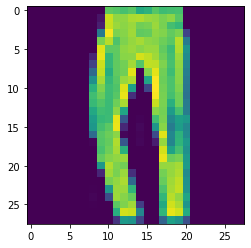

Noise Added Image


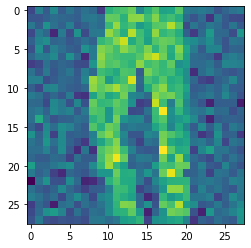

Noise Removal using AutoEncoder


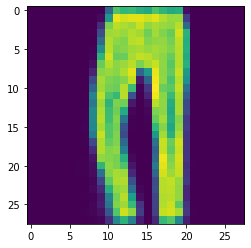

In [58]:
print('Original Image')
plt.imshow(X_test[5])
plt.show()

print('Noise Added Image')
plt.imshow(noisey_images[5])
plt.show()

print('Noise Removal using AutoEncoder')
plt.imshow(denoised[5])
plt.show()